Things to do:


- Apply a regression model
- Build the recommendation system
- Convert all non-numeric values (such as keywords and dictionaries) to numerical values 

In [130]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype

ratingsDS= pd.read_csv('https://home.adelphi.edu/~sl22397/0145-335/code/dataset/p2/ratings_small.csv.zip')
keywordsDS= pd.read_csv('https://home.adelphi.edu/~sl22397/0145-335/code/dataset/p2/keywords.csv.zip')
moviesMetaDS= pd.read_csv('https://home.adelphi.edu/~sl22397/0145-335/code/dataset/p2/movies_metadata.csv.zip')
creditsDS= pd.read_csv('https://home.adelphi.edu/~sl22397/0145-335/code/dataset/p2/credits.csv.zip')

moviesMetaDS.columns = ['Adult','belongs_to_collection','budget','genres','homepage','id','imdb_id', 'original_language','original_title','overview','popularity','poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count']
moviesMetaDS.head()





/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [131]:
moviesMetaDS = moviesMetaDS.drop(['Adult','belongs_to_collection','production_companies','budget','homepage','imdb_id', 'popularity', 'runtime', 'original_language','original_title','overview', 'poster_path', 'release_date', 'revenue',  'spoken_languages', 'status', 'tagline', 'title', 'video','production_countries','vote_average','vote_count'], axis =1)
moviesMetaDS.head()

,genres,id
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357
4,"[{'id': 35, 'name': 'Comedy'}]",11862


In [132]:
ratingsDS = ratingsDS.drop(['timestamp'], axis = 1)
ratingsDS.rename(columns = {'movieId':'id'}, inplace = True)
ratingsDS['id'] = pd.to_numeric(ratingsDS['id'])
ratingsDS.head()

,userId,id,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [133]:
creditsDS['id'] = pd.to_numeric(creditsDS['id'])
creditsDS.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [134]:
keywordsDS['id'] = pd.to_numeric(keywordsDS['id'])
keywordsDS.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [135]:
moviesMetaDS = moviesMetaDS.drop(35587) # noisy data

In [136]:
for num in moviesMetaDS.index:
  if (moviesMetaDS['id'][num].find('-')>=0):
     moviesMetaDS = moviesMetaDS.drop(num)
moviesMetaDS['id'] = pd.to_numeric(moviesMetaDS['id'])


In [137]:
data = pd.merge(moviesMetaDS, ratingsDS)
data = pd.merge(data, keywordsDS)
data = pd.merge(data, creditsDS)
data = data.drop(['crew'], axis =1)
data.head()

,genres,id,userId,rating,keywords,cast
0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,23,3.5,"[{'id': 642, 'name': 'robbery'}, {'id': 703, '...","[{'cast_id': 25, 'character': 'Lt. Vincent Han..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,102,4.0,"[{'id': 642, 'name': 'robbery'}, {'id': 703, '...","[{'cast_id': 25, 'character': 'Lt. Vincent Han..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,232,2.0,"[{'id': 642, 'name': 'robbery'}, {'id': 703, '...","[{'cast_id': 25, 'character': 'Lt. Vincent Han..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,242,5.0,"[{'id': 642, 'name': 'robbery'}, {'id': 703, '...","[{'cast_id': 25, 'character': 'Lt. Vincent Han..."
4,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,263,3.0,"[{'id': 642, 'name': 'robbery'}, {'id': 703, '...","[{'cast_id': 25, 'character': 'Lt. Vincent Han..."


In [138]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'keywords', 'genres']
for feature in features:
    data[feature] = data[feature].apply(literal_eval)

In [139]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [140]:
features = ['cast', 'keywords', 'genres']
for feature in features:
  data[feature] = data[feature].apply(get_list)

In [141]:
data[['id', 'cast', 'keywords', 'genres']].head(5)

,id,cast,keywords,genres
0,949,"[Al Pacino, Robert De Niro, Val Kilmer]","[robbery, detective, bank]","[Action, Crime, Drama]"
1,949,"[Al Pacino, Robert De Niro, Val Kilmer]","[robbery, detective, bank]","[Action, Crime, Drama]"
2,949,"[Al Pacino, Robert De Niro, Val Kilmer]","[robbery, detective, bank]","[Action, Crime, Drama]"
3,949,"[Al Pacino, Robert De Niro, Val Kilmer]","[robbery, detective, bank]","[Action, Crime, Drama]"
4,949,"[Al Pacino, Robert De Niro, Val Kilmer]","[robbery, detective, bank]","[Action, Crime, Drama]"


In [142]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [143]:
# Apply clean_data function to your features.
features = ['cast', 'keywords',  'genres']

for feature in features:
    data[feature] = data[feature].apply(clean_data)

In [144]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + ' '.join(x['genres'])

In [145]:
# Create a new soup feature
data['soup'] = data.apply(create_soup, axis=1)

In [146]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
data['soup'] = data['soup'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(data['soup'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(45042, 7637)

In [147]:
userdata = data[data["userId"] == 4]
userdata.shape

(114, 7)

In [148]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(userdata['soup'])

In [149]:
count_matrix.shape

(114, 598)

In [150]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [151]:
# Reset index of your main DataFrame and construct reverse mapping as before
userdata = userdata.reset_index()
indices = pd.Series(userdata.index, index=userdata['userId'])


In [152]:
userdata.describe(include='all')  

,index,genres,id,userId,rating,keywords,cast,soup
count,114.000000,114,114.000000,114.0,114.000000,114,114,114
unique,NaN,70,NaN,NaN,NaN,114,113,114
top,NaN,[drama],NaN,NaN,NaN,"[composer, mentor, deaf-mute]","[sylvesterstallone, taliashire, burtyoung]",composer mentor deaf-mute richarddreyfuss glen...
freq,NaN,15,NaN,NaN,NaN,1,2,1
mean,21376.087719,NaN,1603.982456,4.0,4.271930,NaN,NaN,NaN
std,12514.464142,NaN,839.782378,0.0,0.971133,NaN,NaN,NaN
min,219.000000,NaN,112.000000,4.0,1.000000,NaN,NaN,NaN
25%,11903.750000,NaN,910.750000,4.0,4.000000,NaN,NaN,NaN
50%,20362.000000,NaN,1964.000000,4.0,5.000000,NaN,NaN,NaN
75%,32102.250000,NaN,2113.000000,4.0,5.000000,NaN,NaN,NaN


In [153]:
data.corr()

,id,userId,rating
id,1.000000,0.001480,-0.007848
userId,0.001480,1.000000,0.007875
rating,-0.007848,0.007875,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94126aeaf0>,
      dtype=object)

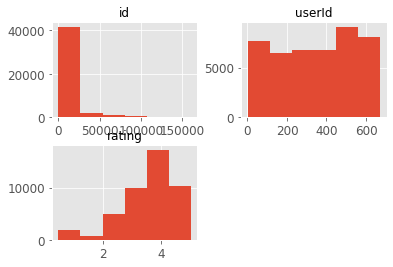

In [154]:
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt


%matplotlib inline

data.hist(bins=6)

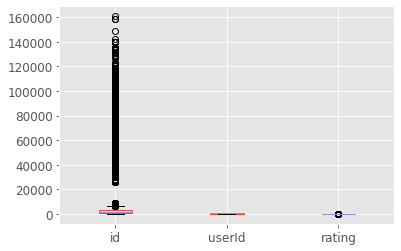

In [155]:
data.boxplot()

In [156]:
ratings_mean_count_data = pd.DataFrame(
    data.groupby('userId')['rating'].mean())
ratings_mean_count_data['rating_counts'] = pd.DataFrame(
    data.groupby('userId')['rating'].count())
ratings_mean_count_data

,rating,rating_counts
userId,,
1,2.333333,6
2,3.517241,58
3,3.540000,25
4,4.271930,114
5,3.915094,53
...,...,...
667,3.543860,57
668,4.200000,10
669,3.818182,11


In [157]:
user_rating = data.pivot_table(
    index='userId', columns='id', values='rating')
user_rating.head()

id,2,3,5,6,11,12,13,14,15,16,...,134158,134368,134569,134881,135536,140174,142507,148652,158238,160718
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
# classifying
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# pretty printing
from pprint import pprint

# visualizing 
import matplotlib.pyplot as plt
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [159]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [160]:
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [161]:
X = np.array(userdata['soup'])

In [162]:
text_data = X
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(text_data, show_progress_bar=True)

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

In [163]:
X = np.array(embeddings)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,2.594438,-5.584585,6.049741,-0.488867,4.014136
1,-5.228250,2.987472,1.670704,-2.262213,-0.494465
2,0.734943,-0.381455,-1.396521,-2.531775,1.456292
3,5.452777,-0.824160,0.756191,0.430160,0.088092
4,-1.170825,3.213209,-1.314165,0.745840,-0.514200


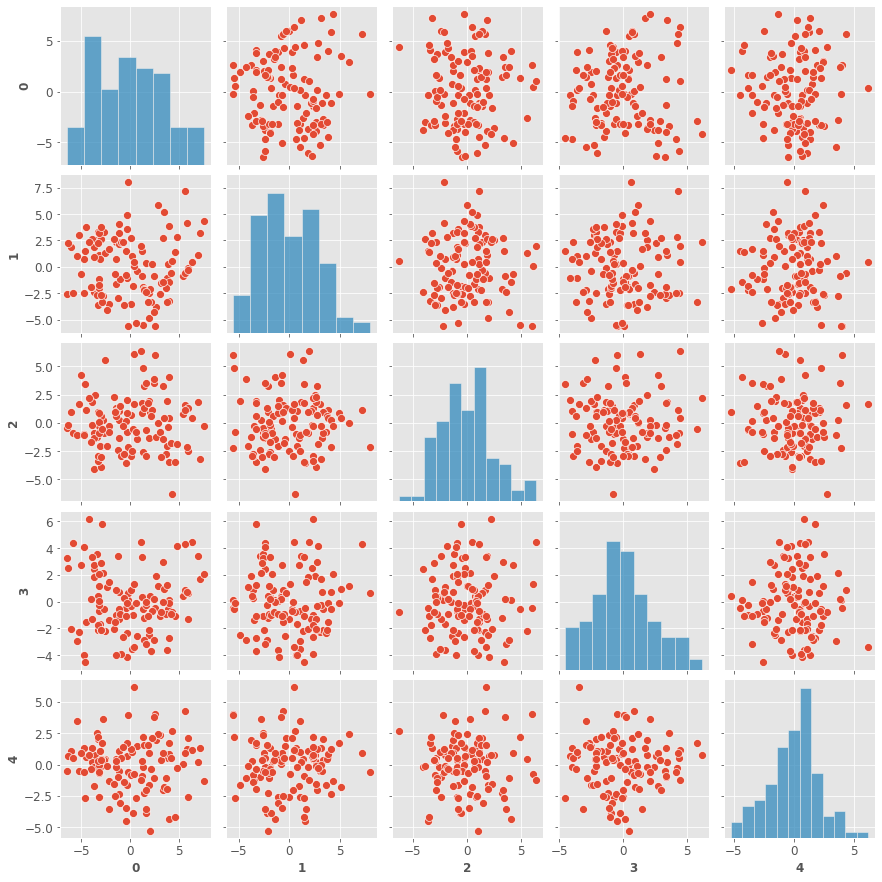

In [164]:
sns.pairplot(pca_data)

Issue of ram when trying to turn the whole dataframe into word soup and then get reccomendations for specific users based of the entire dataframe.

In [165]:
userdata['soup']=embeddings

In [166]:
feature_cols = ['id','soup']


In [167]:
x_train, x_test, y_train, y_test = train_test_split(userdata['soup'], userdata['rating'], shuffle=True, test_size=0.15, random_state=41)
x_train.shape, y_train.shape

((96,), (96,))

In [168]:
# Calculate mean of vote average column
C = data['rating'].mean()
print(C)


3.560932019004485


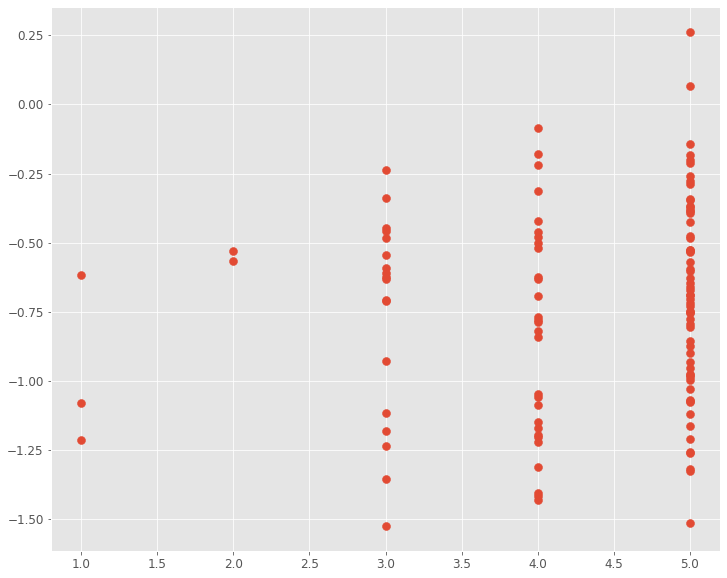

In [169]:
plt.scatter(userdata['rating'], userdata['soup'])

In [170]:
# For linear Regression 

# Testing below:



#For Calculating the mean 
def mean(values):
  return sum(values)/float(len(values))


#For Calculating the variance
def variance(values, mean):
  return sum([(x-mean)**2 for x in values])


#Calculating the mean and assigning 
mean_x = mean(x_train)
print("The mean of x",mean_x)

mean_y = mean(y_train)
print("The mean of y", mean_y)



#Calculating the variance 
var_x = variance(x_train, mean_x)
var_y = variance(y_train, mean_y)


print('x stats: mean and variance', mean_x, var_x)
print('y stats: mean and vairance', mean_y, var_y) 

The mean of x -0.7102113061894973
The mean of y 4.239583333333333
x stats: mean and variance -0.7102113061894973 13.734050392946715
y stats: mean and vairance 4.239583333333333 95.48958333333327


In [171]:
#Calculating Covariance 
def Covariance (x, mean_x, y, mean_y):
  covar = 0.0
  for i in range(len(x)):
    covar += (x[i] - mean_x) * (y[i] - mean_y)
  return covar


covar = Covariance(x_train.values, mean_x, y_train.values, mean_y)
print("The Covarience is:", covar)




The Covarience is: 5.3102682686100415


In [172]:
#Calculating Coefficients 
def coefficients(dataset):
  x = [row[0] for row in dataset]
  y = [row[1] for row in dataset]
  xmean, ymean = mean(x), mean(y)
  b1 = Covariance(x, mean_x, y, mean_y)/variance(x, mean_x)
  b0 = ymean - b1 * mean_x
  return [b1, b0]


b1 = Covariance(x, mean_x, y, mean_y)/variance(x, mean_x)
b0 = mean_y - b1 * mean_x
print("Coefficients:", b1, b0)


Coefficients: -0.06937467261440018 4.190312656479391


In [173]:
def simple_linear_regression(train, test):
  predictions = list()
  b0, b1 = coefficients(train)
  for row in test:
    yhat = b0 + b1 * row[0]
    predictions.append (yhat)
  return predictions 



In [174]:
from math import sqrt

def rmse_metric(actual, predicted):
  sum_error = 0.0
  for i in range(len(actual)):
    prediction_error = predicted[i]-actual[i]
    sum_error += (prediction_error ** 2)
  mean_error = sum_error / float(len(actual))
  return sqrt(mean_error)
  

In [175]:
def evaluate_algorithm(dataset, algorithm):
  test_set = list()
  for row in dataset:
    row_copy = list(row)
    row_copy[-1] = None
    test_set.append(row_copy)
  predicted = algorithm(dataset,test_set)
  actual = [row[-1] for row in dataset]
  rmse = rmse_metric(actual, predicted)
  return rmse
dataset = [x_train.values,y_train.values]
test = [x_test.values,y_test.values]
rmse = evaluate_algorithm(dataset,simple_linear_regression)
print('RMSE: %.3f' % (rmse))

RMSE: 3.676
